<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Setup

In [1]:
#@title Setup
! git clone https://github.com/kuprel/min-dalle
! git lfs install
! git clone https://huggingface.co/dalle-mini/vqgan_imagenet_f16_16384 /content/min-dalle/pretrained/vqgan
! pip install torch flax==0.4.2 wandb
! wandb login --anonymously
! wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mini dalle-mini/dalle-mini/mini-1:v0

Cloning into 'min-dalle'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 120 (delta 62), reused 99 (delta 49), pack-reused 0
Receiving objects: 100% (120/120), 389.87 KiB | 11.47 MiB/s, done.
Resolving deltas: 100% (62/62), done.
Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into '/content/min-dalle/pretrained/vqgan'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 186 kB 6.9 MB/s 
     |████████████████████████████████| 1.8 MB 50.2 MB/s 
    

### Generate Image

parsing metadata from ./pretrained/dalle_bart_mini
tokenizing text
['Ġalien']
['Ġlife']
text tokens [0, 8925, 742, 2]
loading flax encoder
encoding text tokens
loading flax decoder
sampling image tokens
image tokens [6965, 6172, 1052, 14447, 6172, 12062, 15771, 2193, 10710, 4147, 1052, 6172, 2528, 14447, 5772, 8447, 6965, 14447, 14447, 14447, 11665, 6879, 15798, 9479, 910, 15303, 5605, 7542, 1052, 14447, 14447, 2528, 6965, 1052, 14447, 6078, 3386, 2519, 12838, 16017, 867, 8447, 11993, 12426, 11196, 14447, 14447, 2528, 6965, 14447, 14447, 7491, 16147, 13512, 8269, 271, 10397, 15945, 15945, 4903, 12892, 14447, 14447, 2528, 6965, 14447, 14447, 351, 358, 10362, 6001, 8612, 14037, 7864, 14246, 5201, 2810, 14447, 14447, 2528, 6965, 14447, 14447, 10549, 15618, 11792, 13401, 16223, 1464, 12861, 6992, 572, 601, 14447, 14447, 2528, 6965, 14447, 14447, 14447, 13183, 194, 14633, 1994, 10912, 2778, 5495, 12187, 2528, 14447, 14447, 2528, 6965, 14447, 14447, 14447, 2528, 14068, 4054, 5071, 1948, 5286

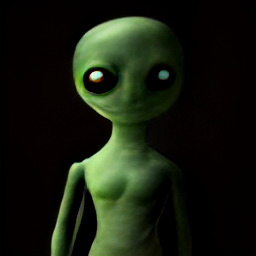

In [2]:
#@title Default title text
text = "alien life" #@param {type:"string"}
seed = 7#@param {type:"integer"}
torch = True
mega = False

import os
os.chdir('/content/min-dalle')
from min_dalle.generate_image import generate_image_from_text
image = generate_image_from_text(text, seed=seed)
display(image)